### 목표
- 손글씨 데이터를 분류(다중)하는 딥러닝 모델링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터셋 불러오기
from tensorflow.keras.datasets import mnist

In [4]:
# 데이터 다운로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# 정답 데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

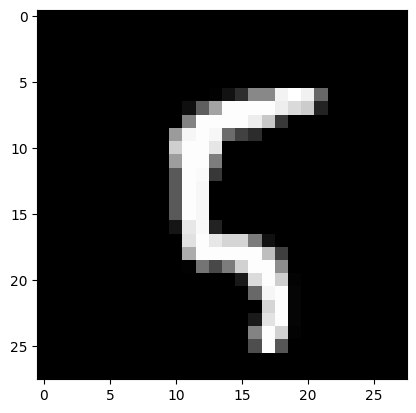

In [7]:
# 문제 데이터 확인
# 각 픽셀은 0 ~ 255 -> 빛의 세기 (0: 검정색, 255: 흰색)
plt.imshow(X_train[100], cmap='gray') # 맷플로립은 기본적으로 RGB 채널임
plt.show()

In [11]:
# 위 이미지의 정답은 5
y_train[100]

5

### MLP 모델링

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
# Flatten : 다차원의 데이터를 1D으로 표현해주는 layer

#### 오차역전파(Backpropagation)
1. 순전파 -> 예측과 함께 연산된 값을 기억하고 있음!
2. 오차계산
3. 역전파 -> (역전파때는) 체인룰이 사용됨 -> 순전파 때 계산해둔 값을 사용해서
대입만으로도 기울기 값을 구할 수 있음! -> 연산량을 확줄임